In [4]:
import sys

if 'google.colab' in sys.modules:
    !pip install "natural-pdf[all]"
else:
    print("Not in Colab")

Not in Colab


In [1]:
from natural_pdf import PDF

## Opening a PDF

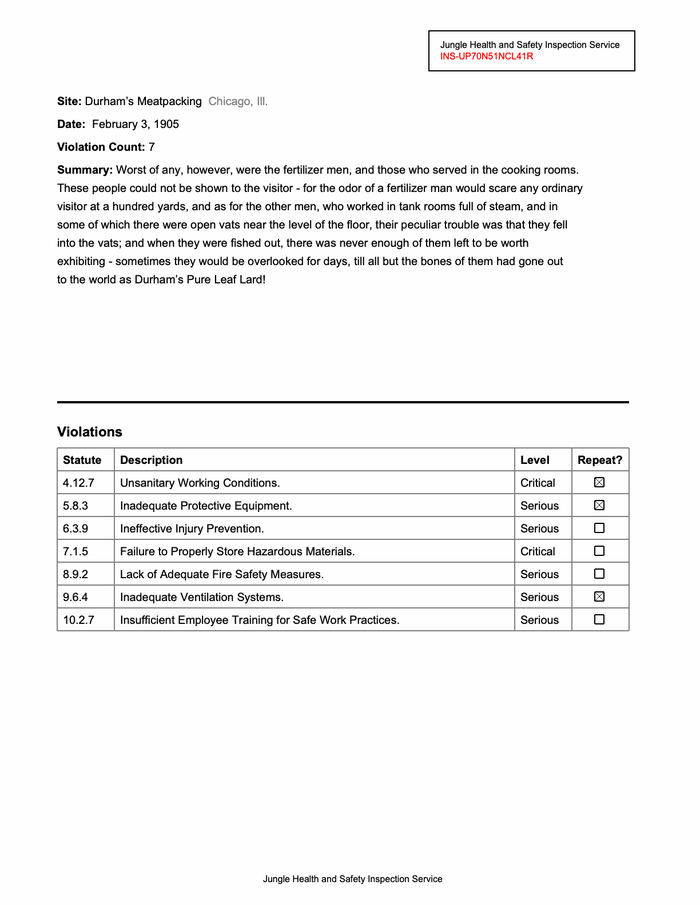

In [3]:
pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/01-practice.pdf")
page = pdf.pages[0]
page.to_image(width=700)

## Finding elements

In [8]:
red_text = page.find('text[color~=red]')
red_text

<TextElement text='INS-UP70N5...' font='Helvetica' size=8.0 bbox=(385.0, 45.65599999999995, 466.35200000000003, 53.65599999999995)>

In [9]:
red_text.text

'INS-UP70N51NCL41R'

## Spatial navigation

In [15]:
print(
    page
        .find('line[width=2]')
        .above()
        .extract_text(layout=True)
        .rstrip()
)

                                                                                    
                                                                                    
                                                                                    
                                                     Jungle Health and Safety Inspection Service
                                                     INS-UP70N51NCL41R              
                                                                                    
       Site: Durham’s Meatpacking  Chicago, Ill.                                    
                                                                                    
       Date:  February 3, 1905                                                      
                                                                                    
       Violation Count: 7                                                           
       Summary: Worst of any, however, were the ferti

In [18]:
print(
    page
        .find('text:contains("Summary")')
        .below(
            include_element=True, 
            until="line[width>=2]"
        )
        .extract_text()
)

'Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.\nThese people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary \nvisitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in \nsome of which there were open vats near the level of the floor, their peculiar trouble was that they fell\ninto the vats; and when they were fished out, there was never enough of them left to be worth \nexhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out\nto the world as Durham’s Pure Leaf Lard!'

## Visual debugging

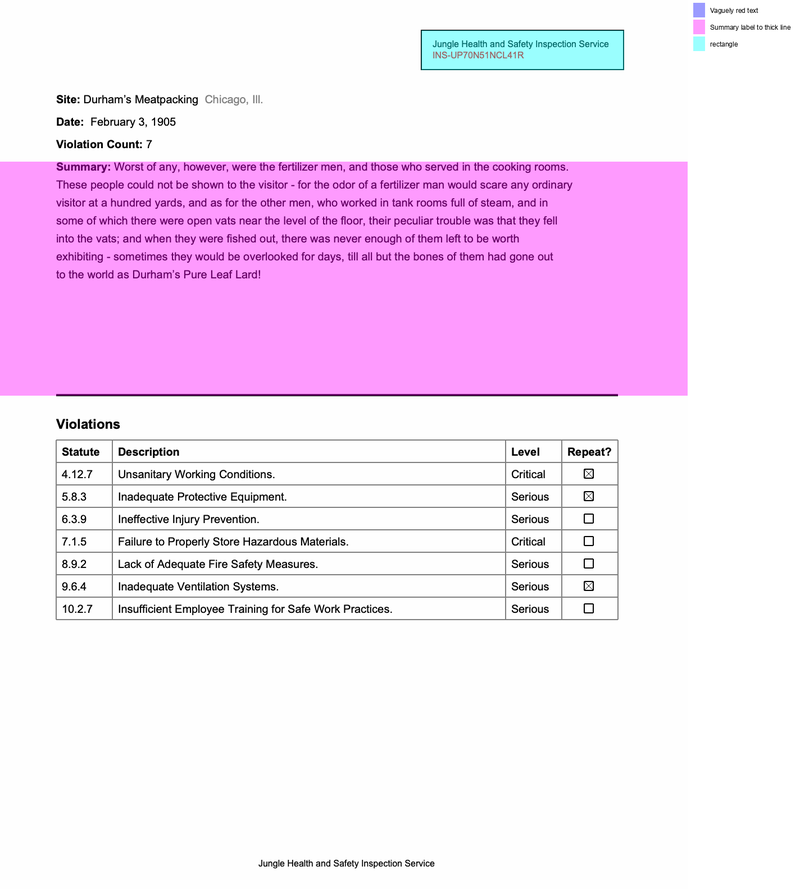

In [20]:
red_text = page.find("text[color~=red]").highlight(label="Vaguely red text")
summary = (
    page.find('text:contains("Summary")')
    .below(include_element=True, until="line[width>=2]")
    .highlight(label="Summary label to thick line")
)
box = page.find("rect").highlight(label="rectangle")

page.to_image(width=800)

In [21]:
red_text.extract_text()

'INS-UP70N51NCL41R'

In [22]:
box.extract_text()

'Jungle Health and Safety Inspection Service\nINS-UP70N51NCL41R'

In [23]:
summary.extract_text()

'Summary: Worst of any, however, were the fertilizer men, and those who served in the cooking rooms.\nThese people could not be shown to the visitor - for the odor of a fertilizer man would scare any ordinary \nvisitor at a hundred yards, and as for the other men, who worked in tank rooms full of steam, and in \nsome of which there were open vats near the level of the floor, their peculiar trouble was that they fell\ninto the vats; and when they were fished out, there was never enough of them left to be worth \nexhibiting - sometimes they would be overlooked for days, till all but the bones of them had gone out\nto the world as Durham’s Pure Leaf Lard!'

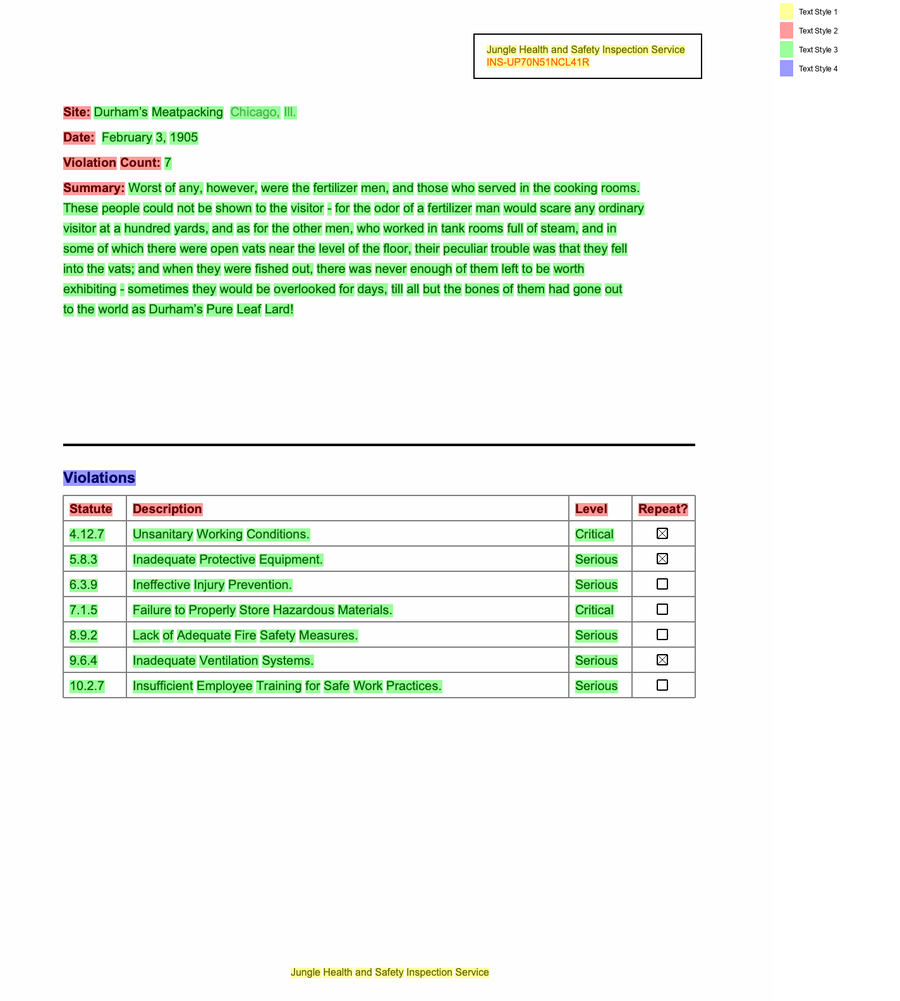

In [24]:
page.clear_highlights()
page.highlight_all(
    include_types=['text'],
    include_text_styles=True,
).to_image(
    width=900,
)

## Layout detection

In [25]:
page.analyze_layout(engine='yolo')


image 1/1 /var/folders/25/h3prywj14qb0mlkl2s8bxq5m0000gn/T/tmpl_8zp6vg/page_0.png: 1024x800 2 titles, 3 plain texts, 2 abandons, 1 table, 629.8ms
Speed: 5.4ms preprocess, 629.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 800)


<Page number=1 index=0>

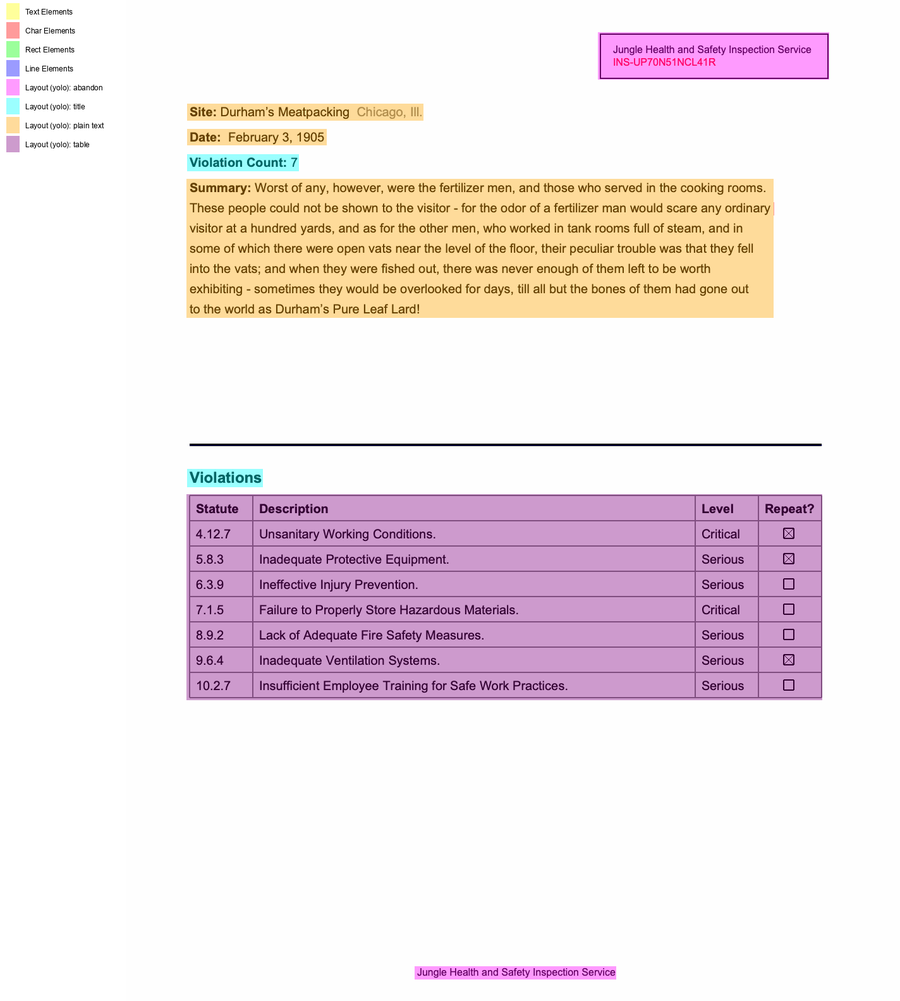

In [27]:
page.clear_highlights()
page.highlight_all(
    include_layout_regions=True
).to_image(
    width=900,
    legend_position='left'
)

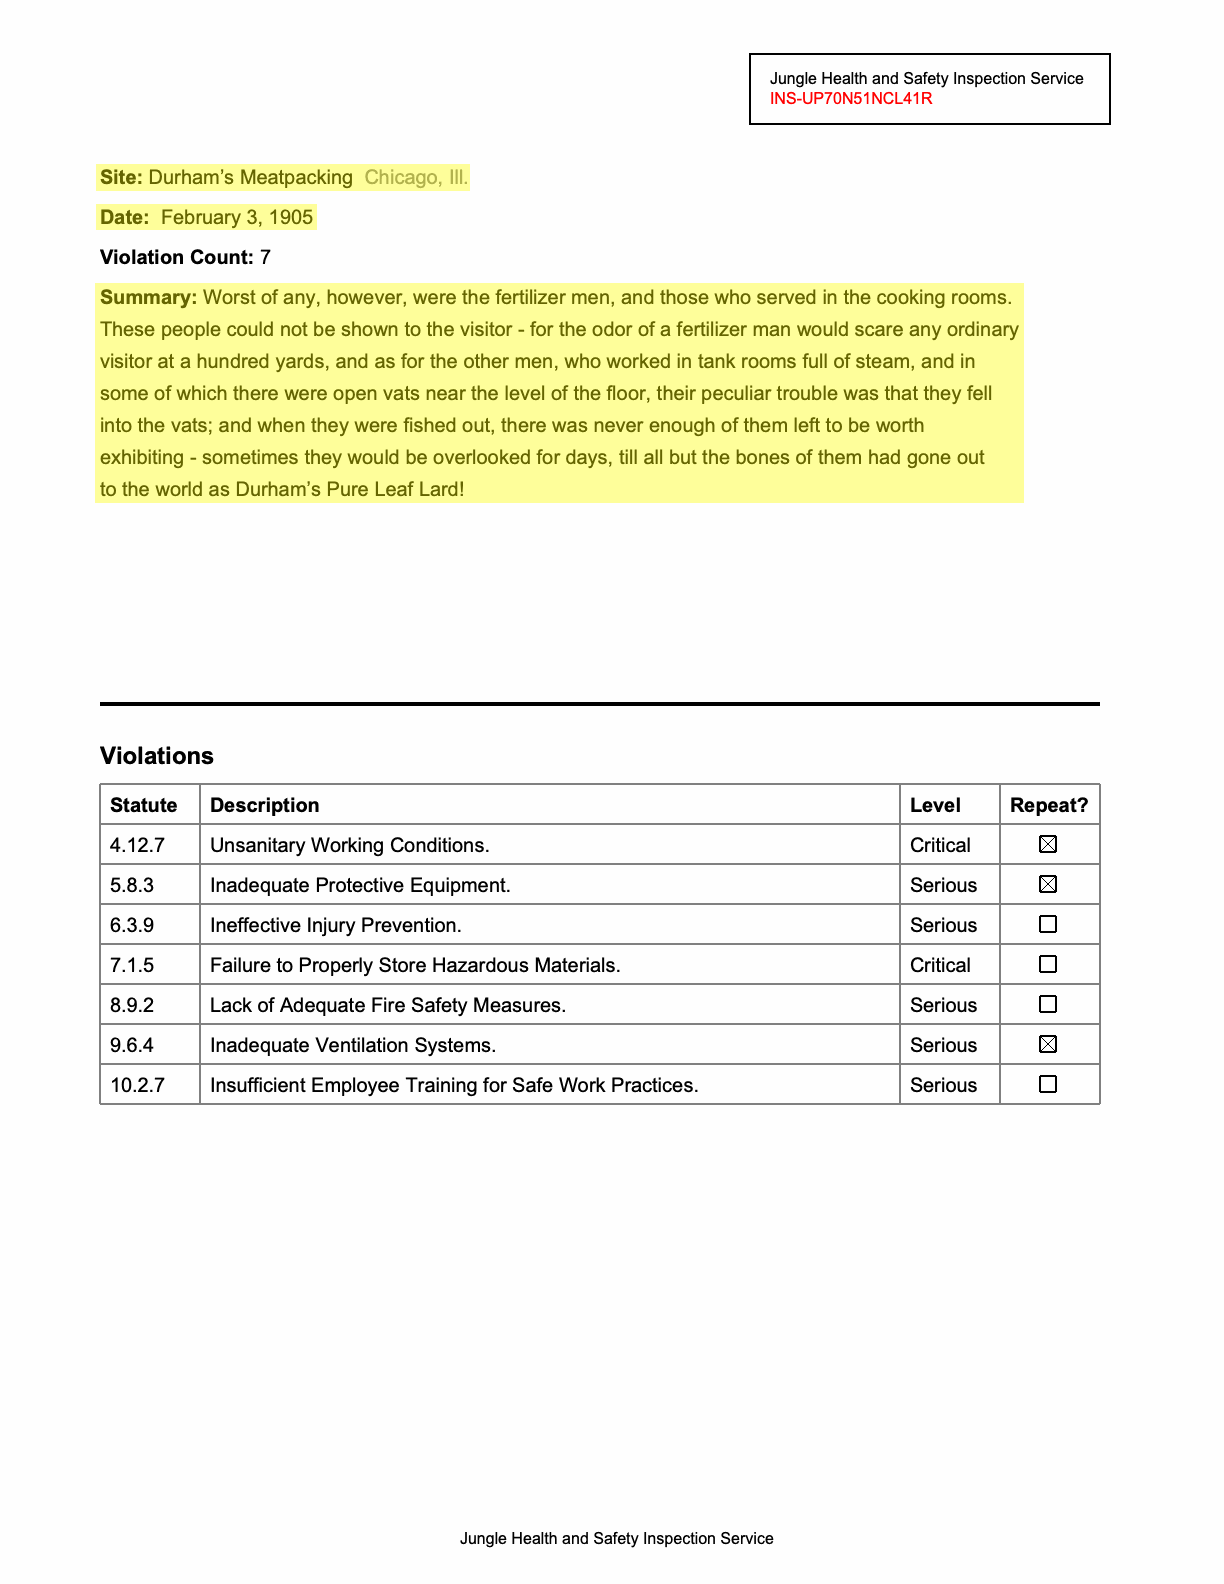

In [28]:
page.clear_highlights()
page.find_all("region[type=plain-text]").highlight()
page.to_image()

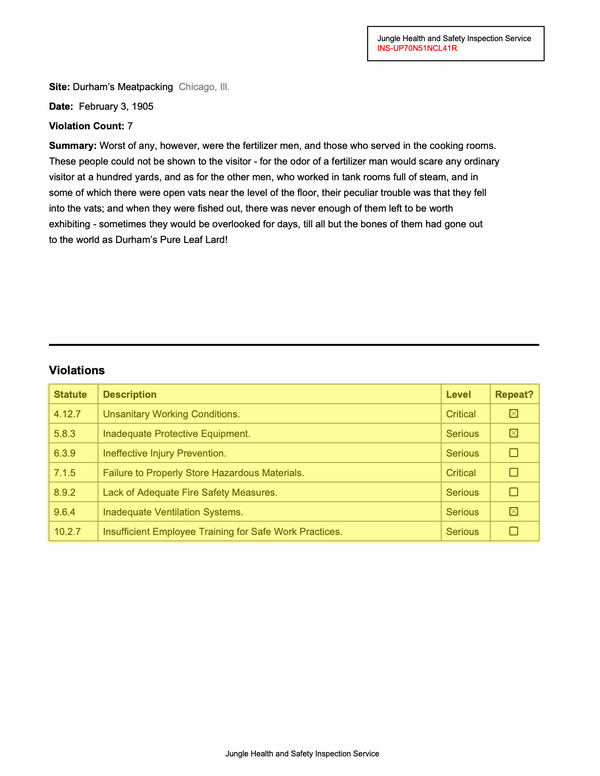

In [29]:
page.clear_highlights()
page.find("region[type='table']").highlight()
page.to_image(width=600)

In [11]:
print(page.find("region[type='table']").extract_text(layout=True))

                                                            
  Statute Description                                    Leve
  4.12.7 Unsanitary Working Conditions.                  Critic
                                                            
  5.8.3  Inadequate Protective Equipment.                Serio
  6.3.9  Ineffective Injury Prevention.                  Serio
                                                            
  7.1.5  Failure to Properly Store Hazardous Materials.  Critic
  8.9.2  Lack of Adequate Fire Safety Measures.          Serio
                                                            
  9.6.4  Inadequate Ventilation Systems.                 Serio
  10.2.7 Insufficient Employee Training for Safe Work Practices. Serio


In [30]:
page.find("region[type='table']").extract_table()

[['Statute', 'Description', 'Level', 'Repeat?'],
 ['4.12.7', 'Unsanitary Working Conditions.', 'Critical', ''],
 ['5.8.3', 'Inadequate Protective Equipment.', 'Serious', ''],
 ['6.3.9', 'Ineffective Injury Prevention.', 'Serious', ''],
 ['7.1.5', 'Failure to Properly Store Hazardous Materials.', 'Critical', ''],
 ['8.9.2', 'Lack of Adequate Fire Safety Measures.', 'Serious', ''],
 ['9.6.4', 'Inadequate Ventilation Systems.', 'Serious', ''],
 ['10.2.7',
  'Insufficient Employee Training for Safe Work Practices.',
  'Serious',
  '']]

## More table work

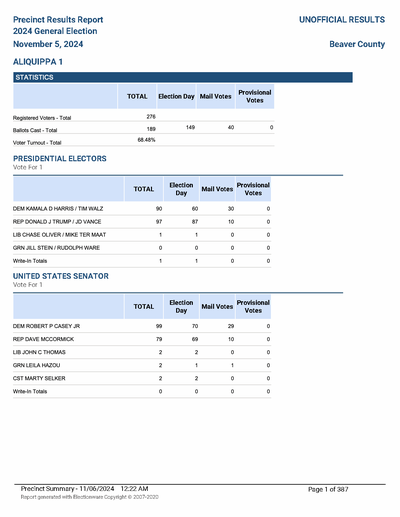

In [3]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/0500000US42007.pdf")
page = pdf.pages[0]
page.to_image(width=400)

In [5]:
pdf.pages[0].ask("What is the date?")

{'answer': 'November 5, 2024',
 'confidence': 0.9988861680030823,
 'start': 3,
 'end': 3,
 'found': True,
 'page_num': 0,
 'source_elements': [<TextElement text='November 5...' font='Roboto-Bold (Roboto-Bold)', variant='AGFGHF' size=13.0, style=['bold'] bbox=(20.0, 62.309999999999945, 127.30199999999999, 75.30999999999995)>]}

In [2]:
page.extract_text()[:100]

'Precinct Results Report UNOFFICIAL RESULTS\n2024 General Election\nNovember 5, 2024 Beaver County\nALIQ'

# Exclusion zones

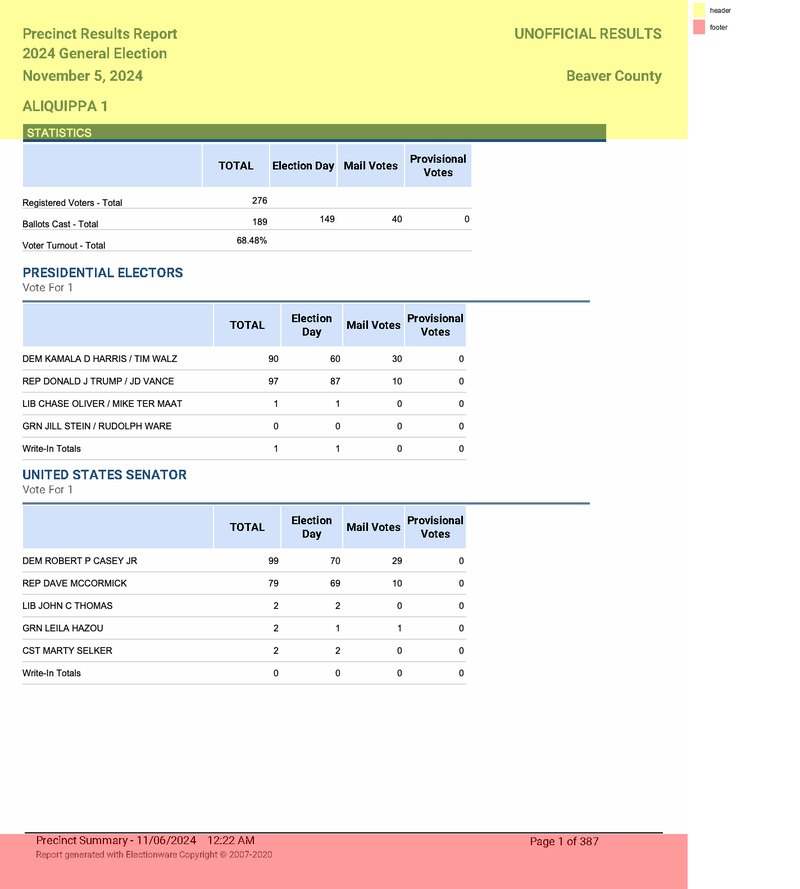

In [6]:
page.clear_highlights()
header = page.find('text:contains("STATISTICS")').above(include_element=True).highlight(label='header')
footer = page.find_all('line')[-1].below().highlight(label='footer')
page.to_image(width=800)

In [7]:
page.add_exclusion(header)
page.add_exclusion(footer)

<Page number=1 index=0>

In [8]:
page.extract_text()[:200]

'Provisional TOTAL Election Day Mail Votes Votes 276 Registered Voters - Total 149 40 0 189 Ballots Cast - Total 68.48% Voter Turnout - Total PRESIDENTIAL ELECTORS Vote For 1 Election Provisional TOTAL'

In [9]:
page.extract_text(use_exclusions=False)[:200]

'Precinct Results Report UNOFFICIAL RESULTS\n2024 General Election\nNovember 5, 2024 Beaver County\nALIQUIPPA 1\nSTATISTICS\nProvisional\nTOTAL Election Day Mail Votes\nVotes\nRegistered Voters - Total 276\nBal'

In [10]:
page.extract_tables()

[[['STATISTICS', None, None, None, None],
  ['', 'TOTAL', 'Election Day', 'Mail Votes', 'Provisional\nVotes']],
 [['', 'TOTAL', 'Election\nDay', 'Mail Votes', 'Provisional\nVotes']],
 [['', 'TOTAL', 'Election\nDay', 'Mail Votes', 'Provisional\nVotes']]]

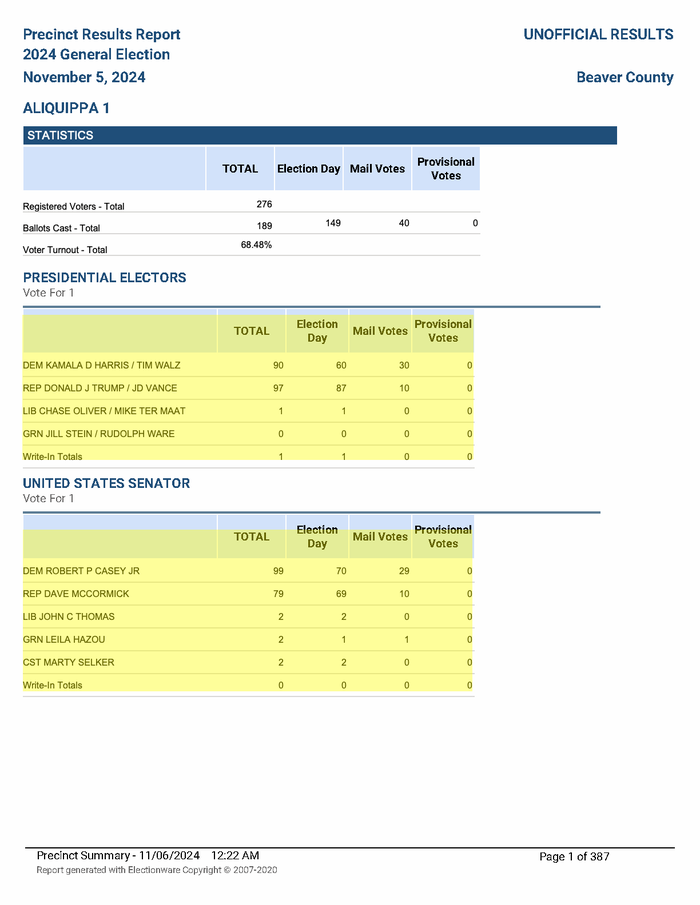

In [11]:
(
    page.analyze_layout(engine="tatr")
    .find_all("region[type=table]")
    .highlight(existing='replace')
    .to_image(width=700)
)

TATR tables have **special powers** when using .extract_table because they understand rows and columns that are used to calculate the cells.

In [12]:
page.find_all('region[type=table]')[0].extract_table()

[['Election Provisional\nTOTAL Mail Votes\nDay Votes'],
 ['', 'TOTAL', 'Election\nDay', 'Mail Votes', 'Provisional\nVotes'],
 ['DEM KAMALA D HARRIS / TIM WALZ', '90', '60', '30', '0'],
 ['REP DONALD J TRUMP / JD VANCE', '97', '87', '10', '0'],
 ['LIB CHASE OLIVER / MIKE TER MAAT', '1', '1', '0', '0'],
 ['GRN JILL STEIN / RUDOLPH WARE', '0', '0', '0', '0'],
 ['Write-In Totals', '1', '1', '0', '0']]

In [13]:
page.find_all('region[type=table]')[1].extract_table()

[['Election Provisional\nTOTAL Mail Votes\nDay Votes'],
 ['', 'TOTAL', 'Election\nDay', 'Mail Votes', 'Provisional\nVotes'],
 ['DEM KAMALA D HARRIS / TIM WALZ', '90', '60', '30', '0'],
 ['REP DONALD J TRUMP / JD VANCE', '97', '87', '10', '0'],
 ['LIB CHASE OLIVER / MIKE TER MAAT', '1', '1', '0', '0'],
 ['GRN JILL STEIN / RUDOLPH WARE', '0', '0', '0', '0'],
 ['Write-In Totals', '1', '1', '0', '0']]

## Exclusion zones, sections, etc

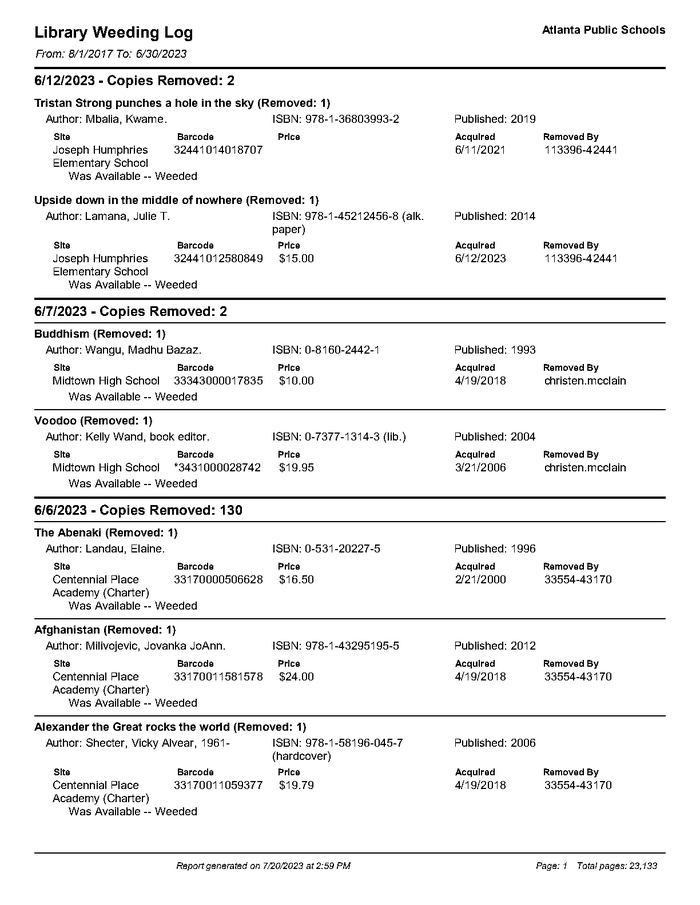

In [14]:
from natural_pdf import PDF

pdf = PDF("https://github.com/jsoma/natural-pdf/raw/refs/heads/main/pdfs/Atlanta_Public_Schools_GA_sample.pdf")
page = pdf.pages[0]
page.to_image(width=700)

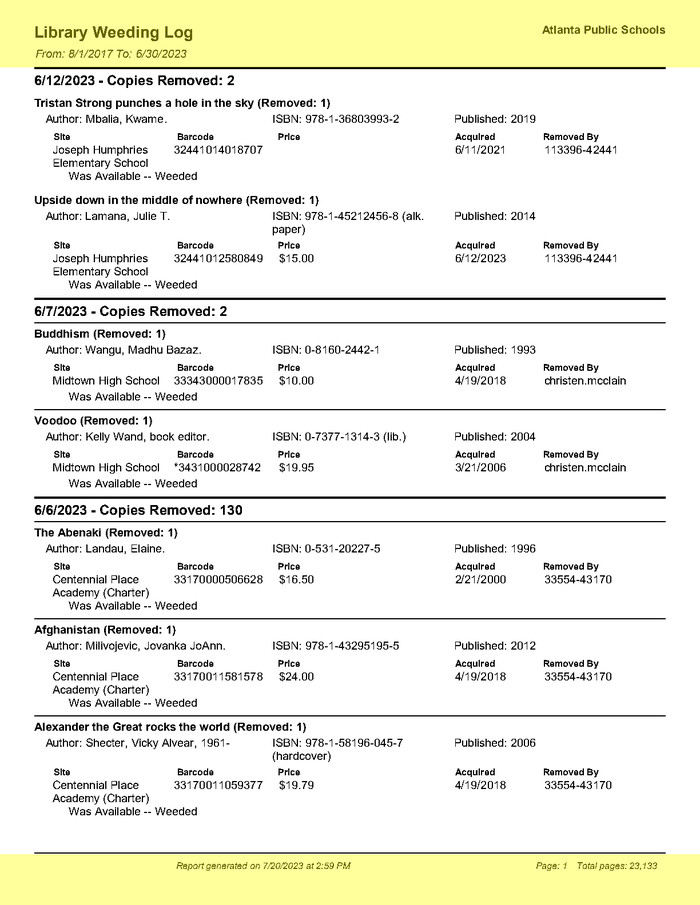

In [15]:
page.clear_highlights()
page.find('line[width=2]').above().highlight()
page.find_all('line')[-1].below().highlight()
page.to_image(width=700)

In [16]:
# Works on ALL pages
pdf.add_exclusion(lambda page: page.find('line[width=2]').above())
pdf.add_exclusion(lambda page: page.find_all('line')[-1].below())

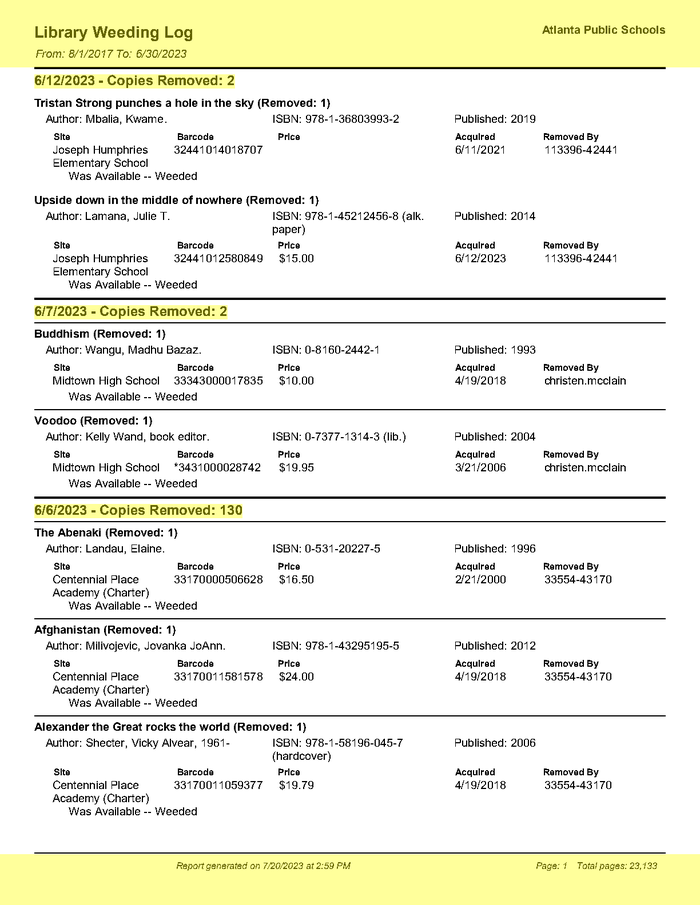

In [17]:
page.find_all('text:contains("Copies Removed")').highlight()
page.to_image(width=700)

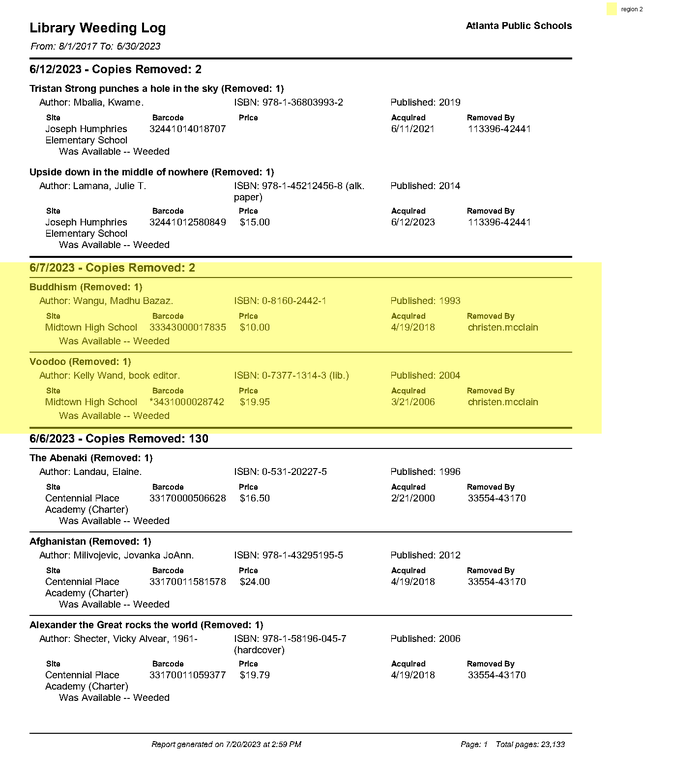

In [18]:
sections = page.get_sections(start_elements='text:contains("Copies Removed")', boundary_inclusion='start')

page.clear_highlights()
# sections[0].highlight(label='region 1')
sections[1].highlight(label='region 2')
# sections[2].highlight(label='region 3')
page.to_image(width=700)

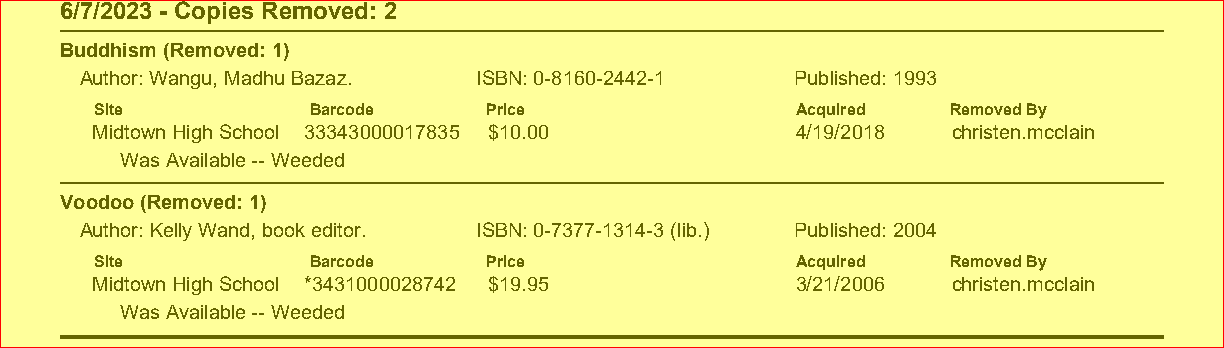

In [19]:
sections[1].to_image()

In [20]:
print(sections[2].extract_text())

6/6/2023 - Copies Removed: 130
The Abenaki (Removed: 1)
Author: Landau, Elaine. ISBN: 0-531-20227-5 Published: 1996
Site Barcode Price Acquired Removed By
Centennial Place 33170000506628 $16.50 2/21/2000 33554-43170
Academy (Charter)
Was Available -- Weeded
Afghanistan (Removed: 1)
Author: Milivojevic, Jovanka JoAnn. ISBN: 978-1-43295195-5 Published: 2012
Site Barcode Price Acquired Removed By
Centennial Place 33170011581578 $24.00 4/19/2018 33554-43170
Academy (Charter)
Was Available -- Weeded
Alexander the Great rocks the world (Removed: 1)
Author: Shecter, Vicky Alvear, 1961- ISBN: 978-1-58196-045-7 Published: 2006
(hardcover)
Site Barcode Price Acquired Removed By
Centennial Place 33170011059377 $19.79 4/19/2018 33554-43170
Academy (Charter)
Was Available -- Weeded


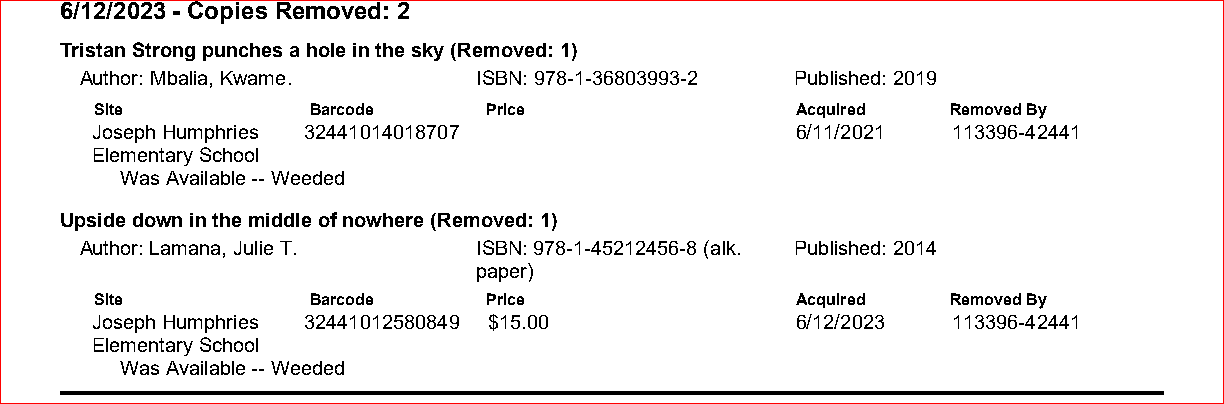

In [21]:
sections[0].to_image()

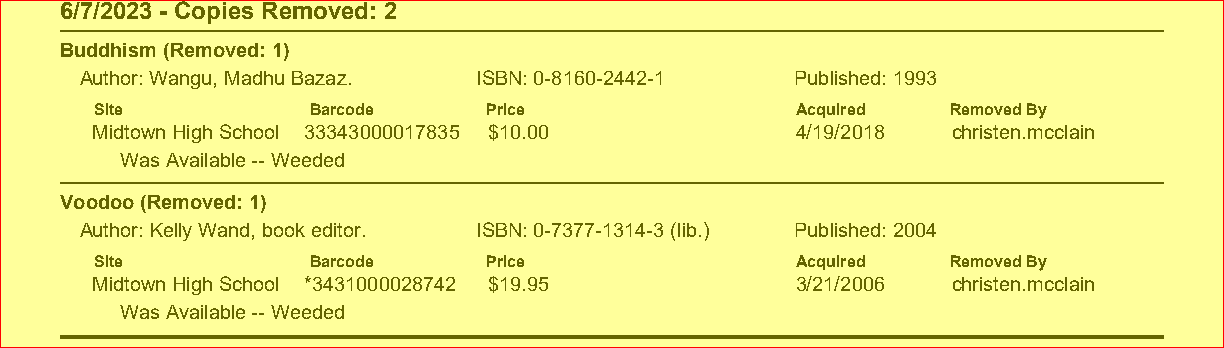

In [22]:
sections[1].to_image()

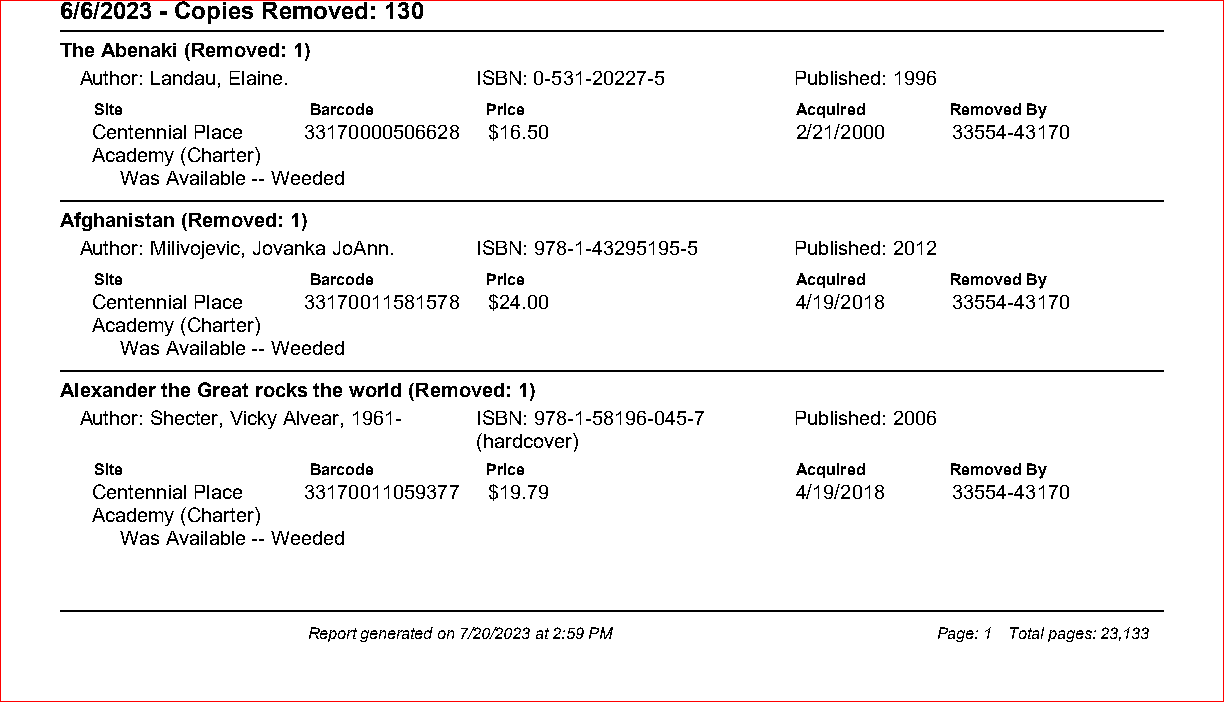

In [23]:
sections[2].to_image()

---
The Abenaki (Removed: 1)
$16.50
---
Afghanistan (Removed: 1)
$24.00
---
Alexander the Great rocks the world (Removed: 1)
$19.79


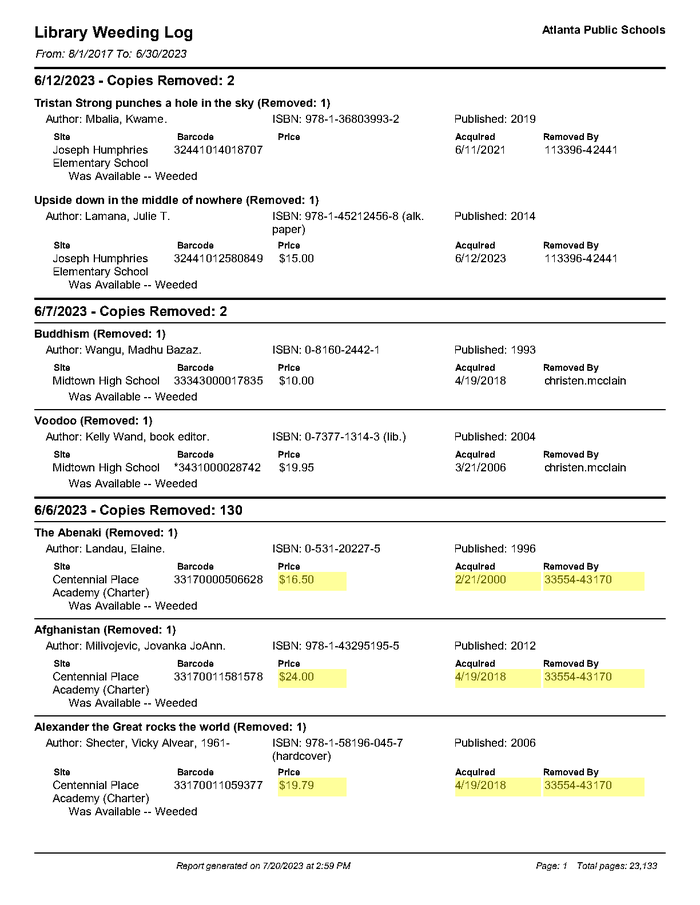

In [24]:
page.clear_highlights()
books = sections[2].get_sections('text[font_variant=AAAAAB][size=10]', boundary_inclusion='start')
for book in books:
    print("---")
    print(book.find('text[font_variant=AAAAAB][size=10]').extract_text())
    price = book.find('text:contains("Price")').below(height=16, width='element').expand(right=40).highlight()
    acquired = book.find('text:contains("Acquired")').below(height=16, width='element').expand(right=40).highlight()
    removed = book.find('text:contains("Removed By")').below(height=16, width='element').expand(right=40).highlight()
    print(price.extract_text())
page.to_image(width=700)

In [25]:
page.clear_highlights()
books = sections[2].get_sections('text[font_variant=AAAAAB][size=10]', boundary_inclusion='start')
for book in books:
    print("---")
    print(book.ask("What is the author?"))
    print(book.ask("What is the price?"))
    print(book.ask("When was it acquired?"))
    print(book.ask("Who was it removed by"))

---
{'answer': 'Author: Landau, Elaine.', 'confidence': 0.9998371601104736, 'start': 1, 'end': 1, 'found': True, 'region': <natural_pdf.elements.region.Region object at 0x3971d75b0>, 'page_num': 0, 'source_elements': [<TextElement text='Author: La...' font='font000000002a8d158a (font000000002a8d158a)', variant='AAAAAD' size=10.0 bbox=(40.0, 475.5, 144.44, 485.5)>]}
{'answer': '$16.50', 'confidence': 0.998553991317749, 'start': 11, 'end': 11, 'found': True, 'region': <natural_pdf.elements.region.Region object at 0x3971d75b0>, 'page_num': 0, 'source_elements': [<TextElement text='$16.50' font='font000000002a8d158a (font000000002a8d158a)', variant='AAAAAD' size=10.0 bbox=(244.0, 502.5, 274.57, 512.5)>]}
{'answer': '2/21/2000', 'confidence': 0.9997754693031311, 'start': 12, 'end': 12, 'found': True, 'region': <natural_pdf.elements.region.Region object at 0x3971d75b0>, 'page_num': 0, 'source_elements': [<TextElement text='2/21/2000' font='font000000002a8d158a (font000000002a8d158a)', varian